# OpenET DisALEXI
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_toa()" helper method.  This example also shows how to get the model variables.

In [1]:
import pprint

import ee

from IPython.display import Image
import openet.disalexi as model

ee.Initialize()

In [13]:
ndvi_palette = ['EFE7E1', '003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
jet_palette = ['FF0000', 'FFFF00', '00FFFF', '0000FF']

### Landsat 8 Collection 1 SR Image

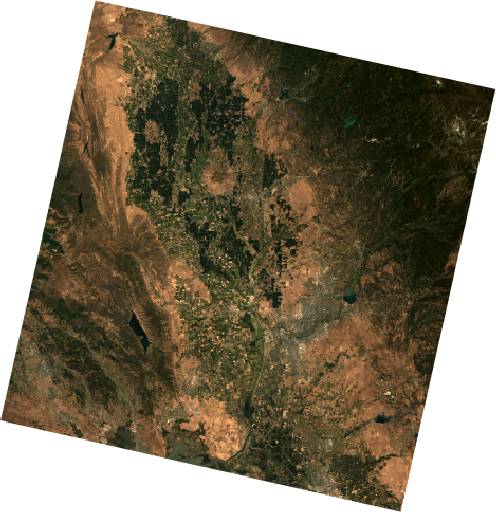

In [3]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170716')
# landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170801')
Image(url=landsat_img.select([3, 2, 1]).getThumbURL({'min': 0.0, 'max': 3000}), 
      embed=True, format='png')

In [4]:
print(landsat_img.get('system:time_start').getInfo())

1500230731090.0


In [5]:
landsat_cs = 30
landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']
landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326').coordinates().getInfo()
landsat_dt = ee.Date(landsat_img.get('system:time_start'))

In [6]:
# Build the DisALEXI object from the Landsat image
model_obj = model.Image.from_landsat_c1_sr(
    landsat_img, etr_source='projects/climate-engine/cimis/daily', etr_band='ETr_ASCE')
#     etr_source='IDAHO_EPSCOR/GRIDMET', etr_band='etr', etr_factor=0.85)
# model_obj = disalexi.Image(ee.Image(landsat.LandsatSR(landsat_img).prep())

### NDVI

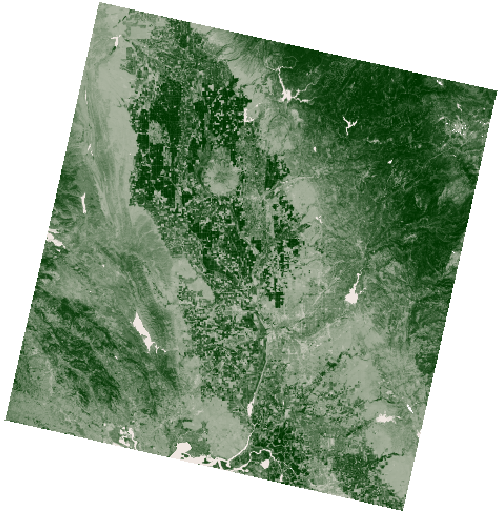

In [7]:
Image(url=model_obj.ndvi.getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette}),
      embed=True, format='png')

### Air Temperature

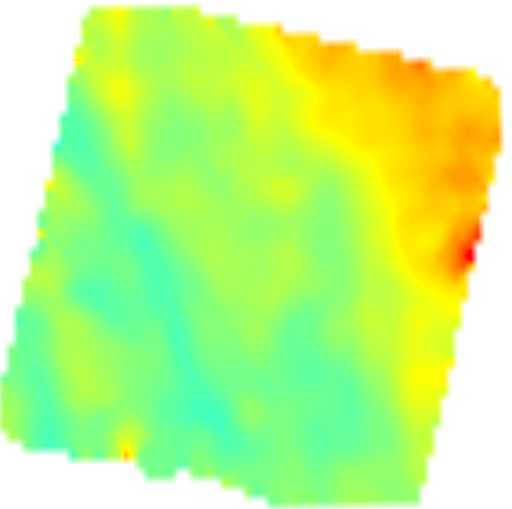

In [14]:
Image(url=model_obj.ta.getThumbURL({'min': 270, 'max': 320, 'palette': jet_palette}),
      embed=True, format='png')

### Bias

In [15]:
# Image(url=model_obj.ta.getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette}),
#       embed=True, format='png')

### ET fraction

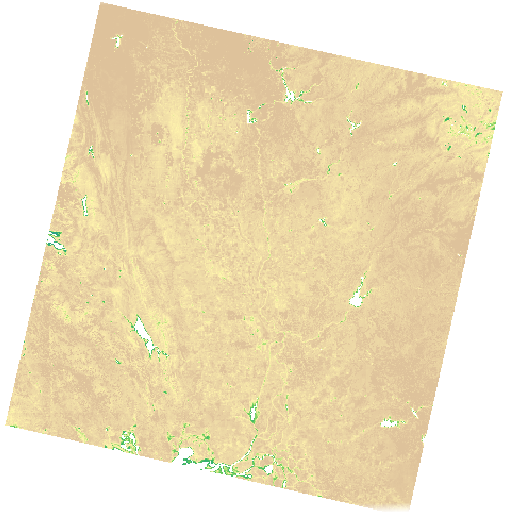

In [8]:
Image(url=model_obj.etf.getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette}),
      embed=True, format='png')

### Reference ET (from CIMIS)

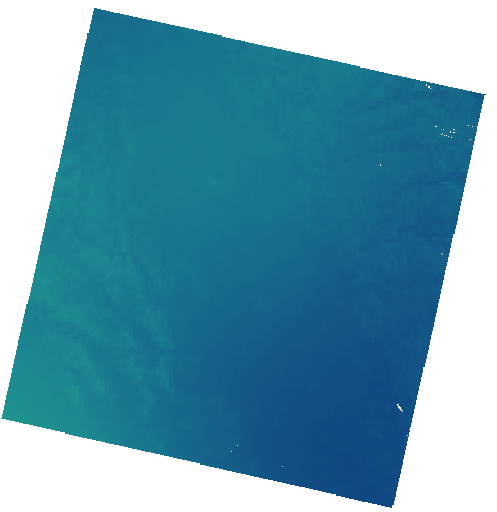

In [9]:
# Clip and project to the Landsat image footprint and coordinate system
Image(url=model_obj.etr.getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette, 'region': landsat_region}),
      embed=True, format='png')

# Reproject is needed if ETr isn't "applied" to the input image in the model code
#         .reproject(crs=landsat_crs, scale=landsat_cs)\


### ET

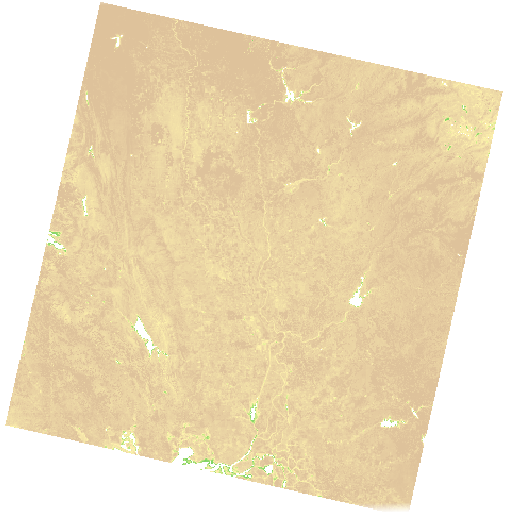

In [10]:
Image(url=model_obj.et.getThumbURL({'min': 0.0, 'max': 15, 'palette': et_palette}),
      embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

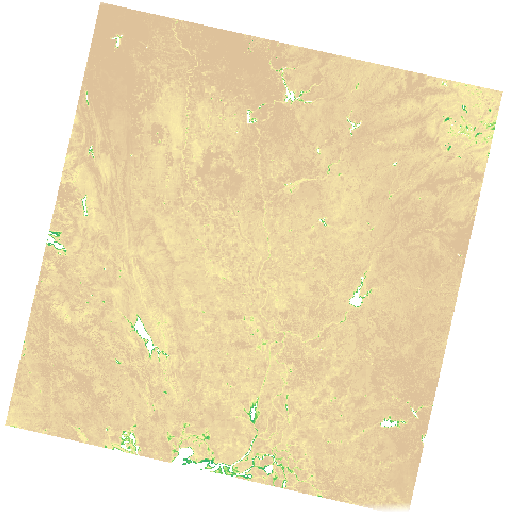

In [11]:
Image(url=model_obj.calculate(['et', 'etr', 'etf']).select(['et'])\
          .getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette}),
      embed=True, format='png')